# My First Neural Network

TensorFlow version: 2.20.0-rc0
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3) (50,000 images, 32x32 pixels, 3 color channels)
Test data shape: (10000, 32, 32, 3) (10,000 images)
Class labels: [0 1 2 3 4 5 6 7 8 9] (0=airplane, 1=automobile, ..., 9=truck)


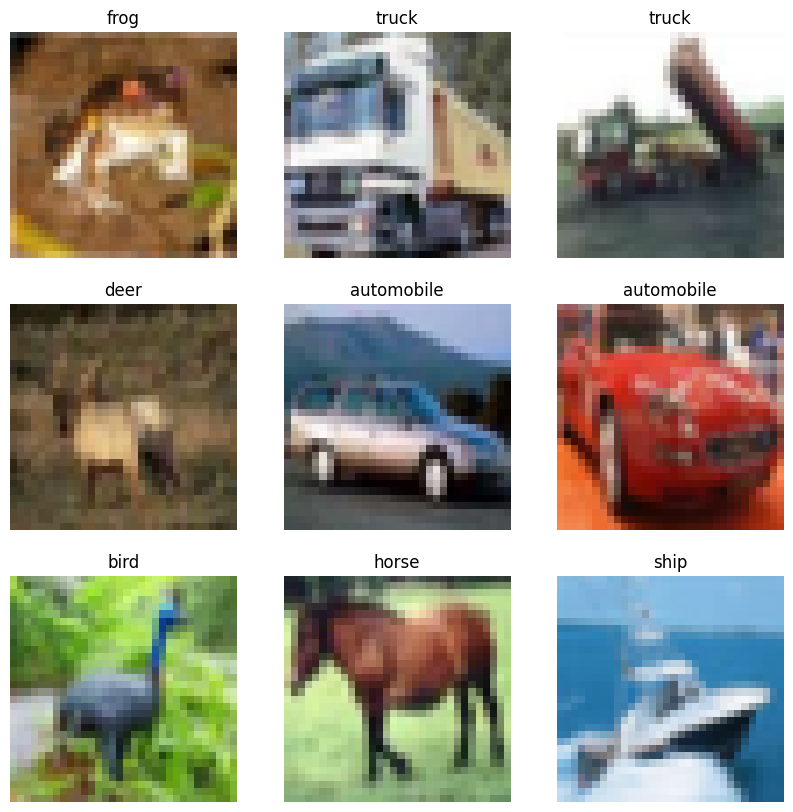

Displayed 9 sample training images above.
Data preprocessing complete. Images normalized, labels one-hot encoded.


/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Model compiled and ready for training.
Starting training. Estimated time: 5-10 minutes total.
Epoch 1/59
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4117 - loss: 1.6331 - val_accuracy: 0.4905 - val_loss: 1.4037
Epoch 2/59
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5450 - loss: 1.2865 - val_accuracy: 0.5582 - val_loss: 1.2421
Epoch 3/59
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6056 - loss: 1.1240 - val_accuracy: 0.6227 - val_loss: 1.0920
Epoch 4/59
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6414 - loss: 1.0284 - val_accuracy: 0.6500 - val_loss: 1.0159
Epoch 5/59
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6644 - loss: 0.9634 - val_accuracy: 0.6426 - val_loss: 1.0414
Epoch 6/59
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6831 - loss: 0.9115 - val_accuracy: 0.6554 - val_loss: 0.9913
Epoch 7/59
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7012 - loss: 0.8634 - val_accuracy: 0.6700 - val_loss: 0.9654
Epoch 8/

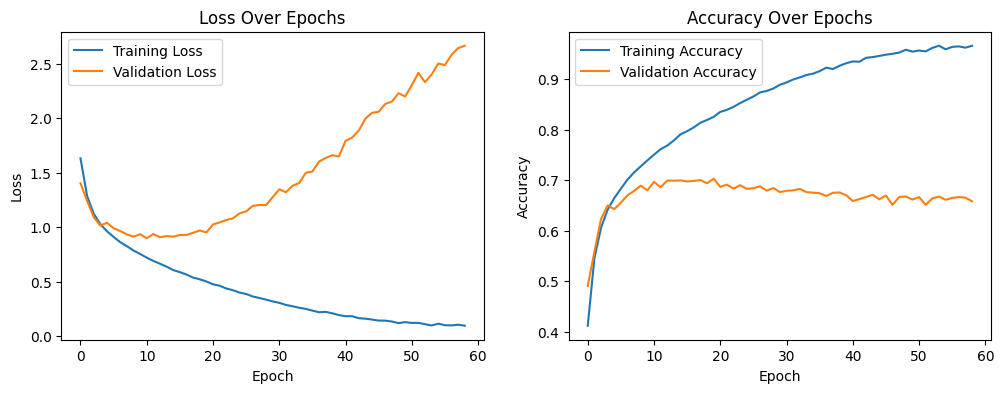

Displayed training history graphs above. Look for decreasing loss and increasing accuracy.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6472 - loss: 2.7816
Test loss: 2.7816, Test accuracy: 0.65 (expect around 0.60-0.70 for this simple model)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


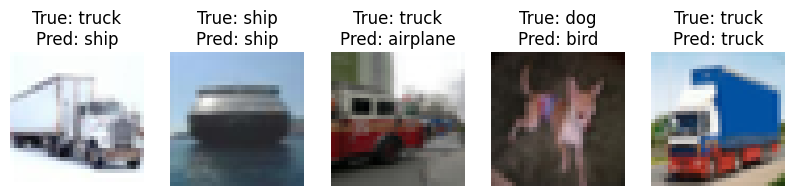

Displayed predictions on 5 test images above. Check if they match!


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

# Suppress specific Protobuf version mismatch warnings (harmless for this example)
warnings.filterwarnings("ignore", message="Protobuf gencode version")

# Print TensorFlow version for debugging
print(f"TensorFlow version: {tf.__version__}")

# This code uses Keras (with TensorFlow backend) to train a simple neural network on the CIFAR-10 dataset.
# CIFAR-10 is a collection of 60,000 color images (32x32 pixels) in 10 classes (e.g., airplane, car, bird, etc.).
# It's more challenging than MNIST because the images are colorful and varied.
# Since you've never trained a neural network before, I'll add lots of comments to explain each step.
# Your MacBook Pro M3 Pro with 24GB memory should handle this easily. TensorFlow on Apple Silicon uses the GPU automatically for faster training.

# We'll use a simple Convolutional Neural Network (CNN) instead of a plain MLP, as CNNs are better for images.
# They learn patterns like edges and shapes. This is still "simple" but more effective for CIFAR-10.
# Estimated training time: About 1-2 minutes per epoch on your hardware (faster if GPU is utilized), so ~5-10 minutes total for 5 epochs.
# We'll add timing prints to track actual time.

# Step 1: Load the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"Training data shape: {x_train.shape} (50,000 images, 32x32 pixels, 3 color channels)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Class labels: {np.unique(y_train)} (0=airplane, 1=automobile, ..., 9=truck)")

# Step 2: Visualize some sample images to understand the data
# This helps you see what the network is learning from.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()
print("Displayed 9 sample training images above.")

# Step 3: Preprocess the data
# Normalize pixel values to 0-1 range (helps the network learn faster).
# Convert labels to one-hot encoding (e.g., class 3 becomes [0,0,0,1,0,0,0,0,0,0]).
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("Data preprocessing complete. Images normalized, labels one-hot encoded.")

# Step 4: Define a simple CNN model
# Input: 32x32x3 images
# Layers: Conv2D (learns filters), MaxPooling (reduces size), Flatten (to 1D), Dense (fully connected).
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),  # 32 filters, 3x3 size
    layers.MaxPooling2D((2, 2)),  # Reduce dimensions by half
    layers.Conv2D(64, (3, 3), activation="relu"),  # More filters for complex patterns
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Flatten to feed into dense layers
    layers.Dense(64, activation="relu"),  # Hidden layer
    layers.Dense(10, activation="softmax")  # Output: 10 classes, softmax for probabilities
])

# Print model summary to see layers and parameters (helps understand the architecture)
model.summary()

# Step 5: Compile the model
# Optimizer: Adam (adjusts learning rate automatically)
# Loss: Categorical crossentropy (for multi-class classification)
# Metrics: Accuracy (percentage correct)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print("Model compiled and ready for training.")

# Step 6: Train the model
# We'll train for 5 epochs (passes over the data). Increase if needed, but start small.
# Batch size 64: Process 64 images at a time.
# Validation split: Use 20% of training data to check progress during training.
# Keras fit() shows a built-in progress bar for each epoch.
print("Starting training. Estimated time: 5-10 minutes total.")
start_time = time.time()  # Track total training time

history = model.fit(x_train, y_train, epochs=59, batch_size=64, validation_split=0.2)

total_time = time.time() - start_time
print(f"Training complete! Total time taken: {total_time / 60:.2f} minutes.")

# Step 7: Plot training graphs to visualize learning
# These show how loss decreases and accuracy increases over epochs.
# Helps understand if the model is improving or overfitting.
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print("Displayed training history graphs above. Look for decreasing loss and increasing accuracy.")

# Step 8: Evaluate on test data
# This tells us how well the model generalizes to unseen images.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f} (expect around 0.60-0.70 for this simple model)")

# Step 9: Make predictions on a few test images to see it in action
# Pick 5 random test images, predict, and show.
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)
samples = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = model.predict(samples)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.show()
print("Displayed predictions on 5 test images above. Check if they match!")

TensorFlow version: 2.20.0-rc0
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3) (50,000 images, 32x32 pixels, 3 color channels)
Test data shape: (10000, 32, 32, 3) (10,000 images)
Class labels: [0 1 2 3 4 5 6 7 8 9] (0=airplane, 1=automobile, ..., 9=truck)


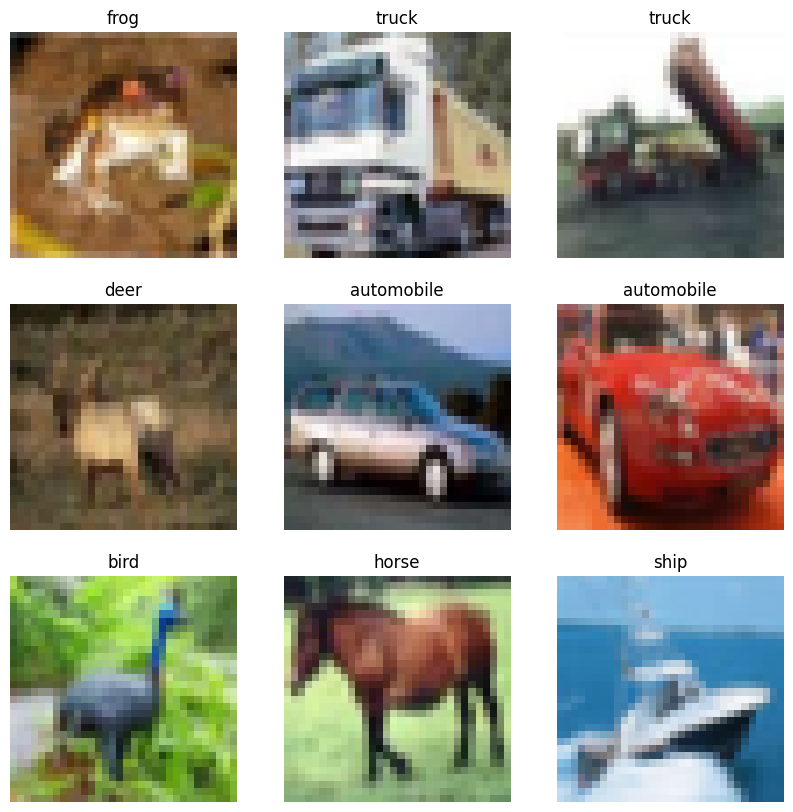

Displayed 9 sample training images above.
Data preprocessing complete. Images normalized, labels one-hot encoded.


/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,658 (2.55 MB)

 Trainable params: 667,274 (2.55 MB)

 Non-trainable params: 384 (1.50 KB)

Model compiled and ready for training.
Starting training with wider layers. Estimated time: 15-25 minutes total (longer due to more neurons).
Epoch 1/100


/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.2848 - loss: 1.9504 - val_accuracy: 0.4178 - val_loss: 1.5443
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3858 - loss: 1.6692 - val_accuracy: 0.4979 - val_loss: 1.3754
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4399 - loss: 1.5419 - val_accuracy: 0.5700 - val_loss: 1.2222
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4690 - loss: 1.4734 - val_accuracy: 0.5291 - val_loss: 1.3018
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4922 - loss: 1.4170 - val_accuracy: 0.5924 - val_loss: 1.1243
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5082 - loss: 1.3780 - val_accuracy: 0.6009 - val_loss: 1.1324
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5303 - loss: 1.3332 - val_accuracy: 0.6161 - val_loss: 1.0901
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5458 - loss: 1.2914 - val_

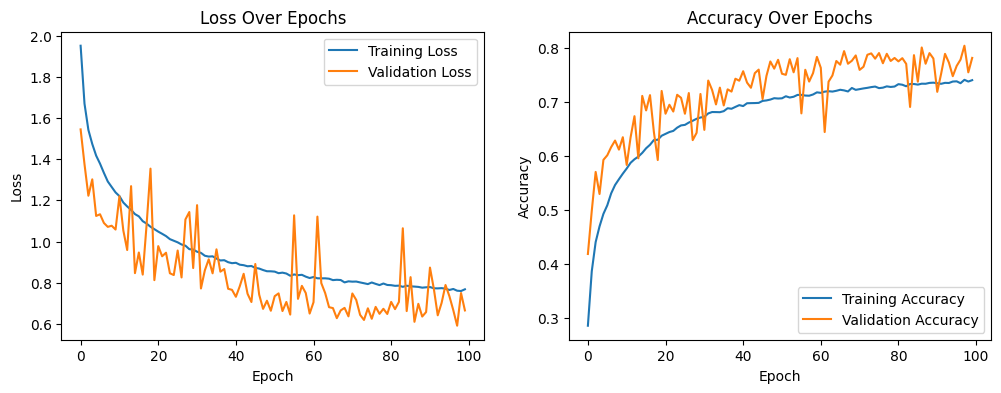

Displayed training history graphs above. Look for decreasing loss and increasing accuracy; if validation plateaus, consider stopping early.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7815 - loss: 0.6656
Test loss: 0.6656, Test accuracy: 0.78 (expect slight improvement, e.g., 0.75-0.85 if previous was 0.70-0.80)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


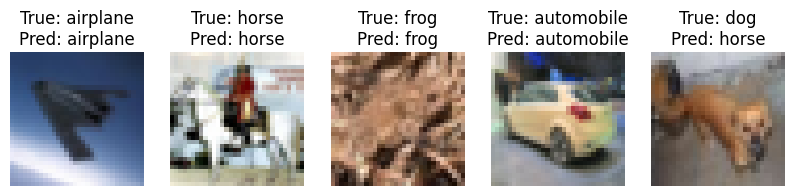

Displayed predictions on 5 test images above. Check if they match!


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

# Suppress specific Protobuf version mismatch warnings (harmless for this example)
warnings.filterwarnings("ignore", message="Protobuf gencode version")

# Print TensorFlow version for debugging
print(f"TensorFlow version: {tf.__version__}")

# Step 1: Load the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f"Training data shape: {x_train.shape} (50,000 images, 32x32 pixels, 3 color channels)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Class labels: {np.unique(y_train)} (0=airplane, 1=automobile, ..., 9=truck)")

# Step 2: Visualize some sample images to understand the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()
print("Displayed 9 sample training images above.")

# Step 3: Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("Data preprocessing complete. Images normalized, labels one-hot encoded.")

# Add data augmentation to improve generalization
datagen = ImageDataGenerator(
    width_shift_range=0.1,    
    height_shift_range=0.1,   
    horizontal_flip=True,     
    rotation_range=20         
)
datagen.fit(x_train)

# Step 4: Define a wider CNN model (increased neurons/filters)
# Changes: First Conv2D: 64 filters (was 32) for more feature extraction early on.
#          Second Conv2D: 128 filters (was 64) to capture more complex patterns.
#          Dense layer: 128 units (was 64) to process more aggregated features.
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),  # Increased from 32
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation="relu"),  # Increased from 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),  # Increased from 64
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

# Print model summary (note the increased parameters due to wider layers)
model.summary()

# Step 5: Compile the model (unchanged)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print("Model compiled and ready for training.")

# Step 6: Train the model with data augmentation and more epochs
print("Starting training with wider layers. Estimated time: 15-25 minutes total (longer due to more neurons).")
start_time = time.time()

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(x_test, y_test))

total_time = time.time() - start_time
print(f"Training complete! Total time taken: {total_time / 60:.2f} minutes.")

# Step 7: Plot training graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print("Displayed training history graphs above. Look for decreasing loss and increasing accuracy; if validation plateaus, consider stopping early.")

# Step 8: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f} (expect slight improvement, e.g., 0.75-0.85 if previous was 0.70-0.80)")

# Step 9: Make predictions on a few test images
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)
samples = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = model.predict(samples)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.show()
print("Displayed predictions on 5 test images above. Check if they match!")

TensorFlow version: 2.20.0-rc0
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3) (50,000 images, 32x32 pixels, 3 color channels)
Test data shape: (10000, 32, 32, 3) (10,000 images)
Class labels: [0 1 2 3 4 5 6 7 8 9] (0=airplane, 1=automobile, ..., 9=truck)


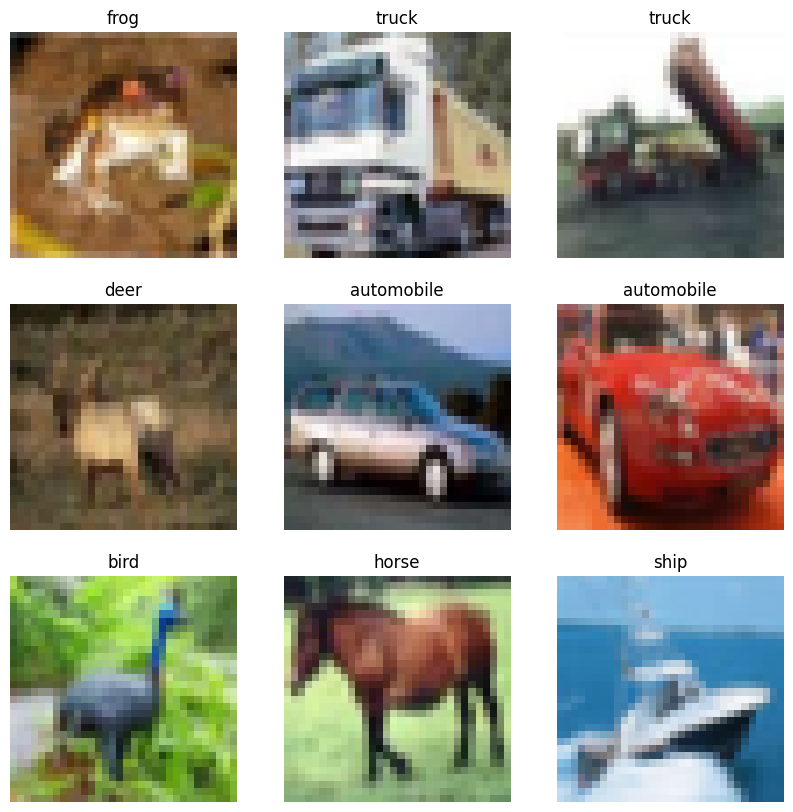

Displayed 9 sample training images above.
Data preprocessing complete. Images normalized, labels one-hot encoded.


/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,006,858 (3.84 MB)

 Trainable params: 1,005,706 (3.84 MB)

 Non-trainable params: 1,152 (4.50 KB)

Model compiled and ready for training.
Starting training with wider layers. Estimated time: 15-25 minutes total (longer due to more neurons).
Epoch 1/200


/Users/chandlercampbell/.venvs/default/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.3294 - loss: 1.8766 - val_accuracy: 0.4108 - val_loss: 1.8632
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.4398 - loss: 1.5526 - val_accuracy: 0.4507 - val_loss: 1.5651
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.4874 - loss: 1.4331 - val_accuracy: 0.5242 - val_loss: 1.4639
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5176 - loss: 1.3584 - val_accuracy: 0.5855 - val_loss: 1.2014
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5466 - loss: 1.2919 - val_accuracy: 0.6037 - val_loss: 1.1178
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5672 - loss: 1.2305 - val_accuracy: 0.6043 - val_loss: 1.1072
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5884 - loss: 1.1843 - val_accuracy: 0.6597 - val_loss: 0.9887
Epoch 8/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6064 - loss: 1.1412 - val_

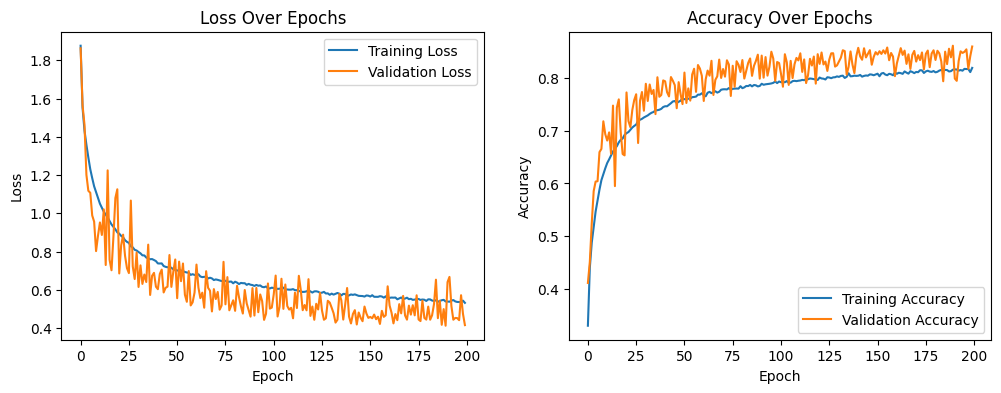

Displayed training history graphs above. Look for decreasing loss and increasing accuracy; if validation plateaus, consider stopping early.
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8606 - loss: 0.4151
Test loss: 0.4151, Test accuracy: 0.86 (expect slight improvement, e.g., 0.75-0.85 if previous was 0.70-0.80)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


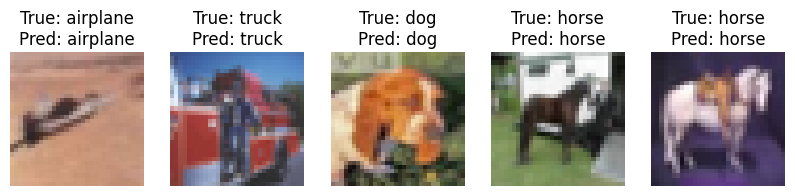

Displayed predictions on 5 test images above. Check if they match!


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

# Suppress specific Protobuf version mismatch warnings (harmless for this example)
warnings.filterwarnings("ignore", message="Protobuf gencode version")

# Print TensorFlow version for debugging
print(f"TensorFlow version: {tf.__version__}")

# Step 1: Load the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f"Training data shape: {x_train.shape} (50,000 images, 32x32 pixels, 3 color channels)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Class labels: {np.unique(y_train)} (0=airplane, 1=automobile, ..., 9=truck)")

# Step 2: Visualize some sample images to understand the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()
print("Displayed 9 sample training images above.")

# Step 3: Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("Data preprocessing complete. Images normalized, labels one-hot encoded.")

# Add data augmentation to improve generalization
datagen = ImageDataGenerator(
    width_shift_range=0.1,    
    height_shift_range=0.1,   
    horizontal_flip=True,     
    rotation_range=20         
)
datagen.fit(x_train)

# Step 4: Define a wider CNN model (increased neurons/filters)
# Changes: First Conv2D: 64 filters (was 32) for more feature extraction early on.
#          Second Conv2D: 128 filters (was 64) to capture more complex patterns.
#          Dense layer: 128 units (was 64) to process more aggregated features.
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),  # Increased from 32
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation="relu"),  # Increased from 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation="relu"),  # Increased from 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),  # Increased from 64
    layers.Dropout(0.6),
    layers.Dense(10, activation="softmax")
])

# Print model summary (note the increased parameters due to wider layers)
model.summary()

# Step 5: Compile the model (unchanged)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print("Model compiled and ready for training.")

# Step 6: Train the model with data augmentation and more epochs
print("Starting training with wider layers. Estimated time: 15-25 minutes total (longer due to more neurons).")
start_time = time.time()

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=200,
                    validation_data=(x_test, y_test))

total_time = time.time() - start_time
print(f"Training complete! Total time taken: {total_time / 60:.2f} minutes.")

# Step 7: Plot training graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print("Displayed training history graphs above. Look for decreasing loss and increasing accuracy; if validation plateaus, consider stopping early.")

# Step 8: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f} (expect slight improvement, e.g., 0.75-0.85 if previous was 0.70-0.80)")

# Step 9: Make predictions on a few test images
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)
samples = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = model.predict(samples)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.show()
print("Displayed predictions on 5 test images above. Check if they match!")

TensorFlow version: 2.20.0-rc0
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3) (50,000 images, 32x32 pixels, 3 color channels)
Test data shape: (10000, 32, 32, 3) (10,000 images)
Class labels: [0 1 2 3 4 5 6 7 8 9] (0=airplane, 1=automobile, ..., 9=truck)


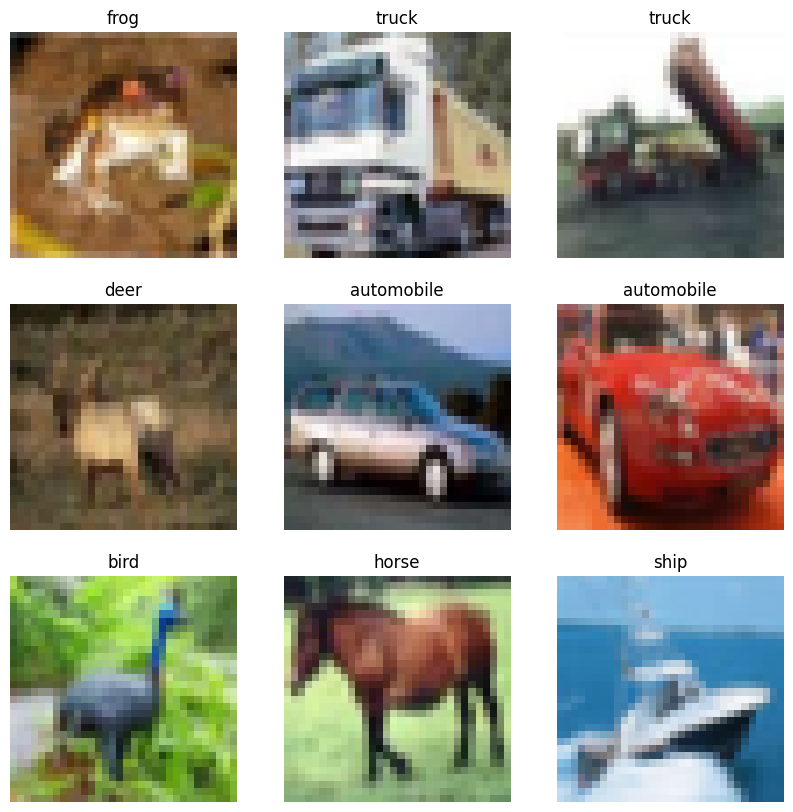

Displayed 9 sample training images above.
Data preprocessing complete. Images normalized, labels one-hot encoded.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,077,450 (23.18 MB)

 Trainable params: 6,074,250 (23.17 MB)

 Non-trainable params: 3,200 (12.50 KB)

Model compiled and ready for training.
Epoch 1/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 230ms/step - accuracy: 0.3440 - loss: 1.8640 - val_accuracy: 0.3426 - val_loss: 2.2656
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 236ms/step - accuracy: 0.4710 - loss: 1.4799 - val_accuracy: 0.4610 - val_loss: 1.6171
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 192s 245ms/step - accuracy: 0.5340 - loss: 1.3191 - val_accuracy: 0.5234 - val_loss: 1.4862
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 191s 245ms/step - accuracy: 0.5818 - loss: 1.2037 - val_accuracy: 0.6249 - val_loss: 1.0584
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 242ms/step - accuracy: 0.6144 - loss: 1.1215 - val_accuracy: 0.5767 - val_loss: 1.3192
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 240ms/step - accuracy: 0.6341 - loss: 1.0630 - val_accuracy: 0.5433 - val_loss: 1.5812
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.6551 - loss: 1.0188 - val_accuracy: 0.7166 - val_loss: 0.8350
Epoch 8/200
782/782 ━━━━━━━━━━

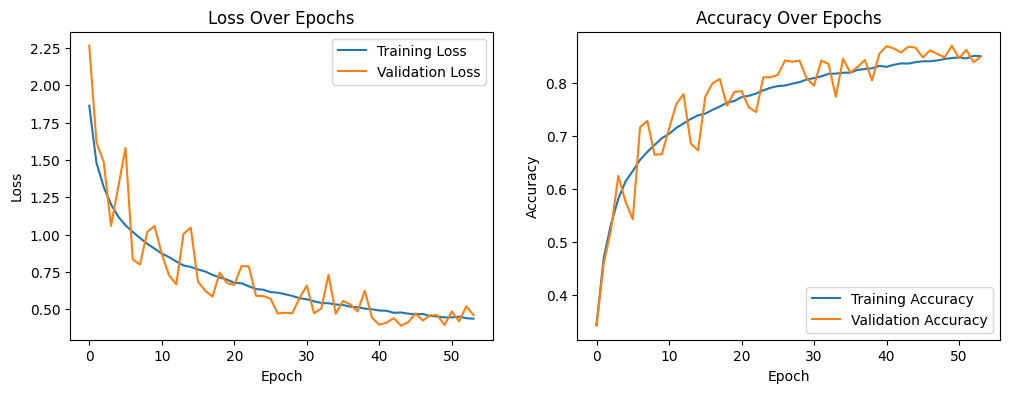

Displayed training history graphs above. Look for decreasing loss and increasing accuracy; early stopping should prevent overfitting if validation plateaus.
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8685 - loss: 0.3905
Test loss: 0.3905, Test accuracy: 0.87 (expect slight improvement, e.g., 0.75-0.85 if previous was 0.70-0.80)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


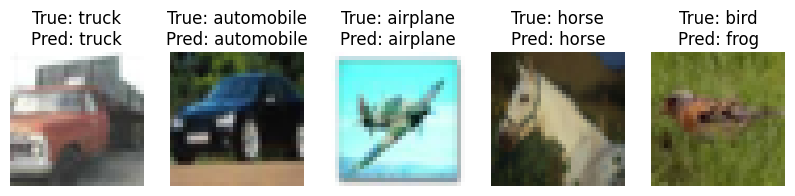

Displayed predictions on 5 test images above. Check if they match!


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.callbacks import EarlyStopping  # Added for early stopping
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

# Suppress specific warnings (harmless for this example)
warnings.filterwarnings("ignore", message="Protobuf gencode version")
warnings.filterwarnings("ignore", category=UserWarning)  # Additional suppression if needed

# Print TensorFlow version for debugging
print(f"TensorFlow version: {tf.__version__}")

# Step 1: Load the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f"Training data shape: {x_train.shape} (50,000 images, 32x32 pixels, 3 color channels)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Class labels: {np.unique(y_train)} (0=airplane, 1=automobile, ..., 9=truck)")

# Step 2: Visualize some sample images to understand the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()
print("Displayed 9 sample training images above.")

# Step 3: Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("Data preprocessing complete. Images normalized, labels one-hot encoded.")

# Add data augmentation to improve generalization
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20
)
datagen.fit(x_train)

# Step 4: Define a wider CNN model (increased neurons/filters)
# Changes: Added padding='same' to all Conv2D to prevent dimension errors.
# First Conv2D: 64 filters (was 32) for more feature extraction early on.
# Second Conv2D: 512 filters (was 64) to capture more complex patterns.
# Dense layer: 512 units (was 64) to process more aggregated features.
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", padding='same', input_shape=(32, 32, 3)),  # Increased from 32
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(512, (3, 3), activation="relu", padding='same'),  # Increased from 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(512, (3, 3), activation="relu", padding='same'),  # Increased from 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(512, (3, 3), activation="relu", padding='same'),  # Increased from 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),  # Increased from 64
    layers.Dropout(0.6),
    layers.Dense(10, activation="softmax")
])

# Print model summary (note the increased parameters due to wider layers)
model.summary()

# Step 5: Compile the model (unchanged)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print("Model compiled and ready for training.")

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Step 6: Train the model with data augmentation, more epochs, and early stopping
start_time = time.time()
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=200,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])  # Added early stopping here
total_time = time.time() - start_time
print(f"Training complete! Total time taken: {total_time / 60:.2f} minutes.")

# Step 7: Plot training graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Displayed training history graphs above. Look for decreasing loss and increasing accuracy; early stopping should prevent overfitting if validation plateaus.")

# Step 8: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f} (expect slight improvement, e.g., 0.75-0.85 if previous was 0.70-0.80)")

# Step 9: Make predictions on a few test images
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)
samples = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = model.predict(samples)
pred_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.show()
print("Displayed predictions on 5 test images above. Check if they match!")

TensorFlow version: 2.20.0-rc0
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3) (50,000 images, 32x32 pixels, 3 color channels)
Test data shape: (10000, 32, 32, 3) (10,000 images)
Class labels: [0 1 2 3 4 5 6 7 8 9] (0=airplane, 1=automobile, ..., 9=truck)


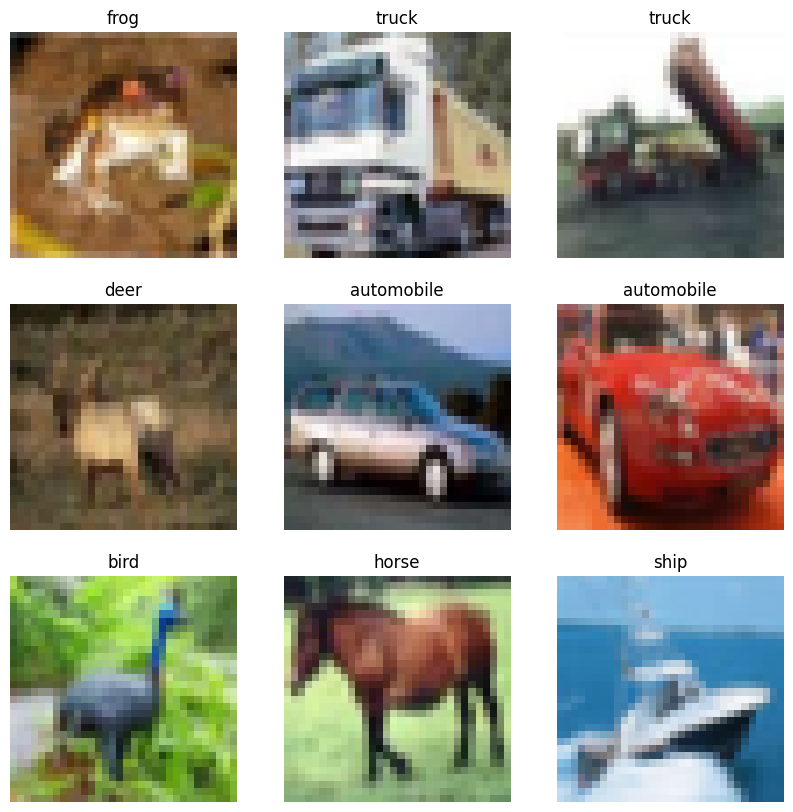

Displayed 9 sample training images above.
Data preprocessing complete. Images normalized (channel-wise), labels one-hot encoded.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │      1,792 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 32, 32,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 32, 32,    │      8,320 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │ conv2d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 16, 16,    │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 16, 16,    │          0 │ max_pooling2d_12… │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 16, 16,    │    295,168 │ dropout_15[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      1,024 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 16, 16,    │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      1,024 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 16, 16,    │     33,024 │ dropout_15[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 16, 16,    │          0 │ batch_normalizat

 Total params: 9,028,746 (34.44 MB)

 Trainable params: 9,025,034 (34.43 MB)

 Non-trainable params: 3,712 (14.50 KB)

Model compiled and ready for training.
Epoch 1/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 386s 985ms/step - accuracy: 0.3016 - loss: 4.6866 - val_accuracy: 0.3636 - val_loss: 4.0795 - learning_rate: 0.0100
Epoch 2/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 390s 998ms/step - accuracy: 0.4023 - loss: 3.8499 - val_accuracy: 0.3059 - val_loss: 5.4464 - learning_rate: 0.0100
Epoch 3/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 390s 998ms/step - accuracy: 0.4621 - loss: 3.4174 - val_accuracy: 0.3838 - val_loss: 4.3248 - learning_rate: 0.0100
Epoch 4/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 391s 1000ms/step - accuracy: 0.5131 - loss: 3.0526 - val_accuracy: 0.4343 - val_loss: 3.7758 - learning_rate: 0.0100
Epoch 5/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 389s 995ms/step - accuracy: 0.5587 - loss: 2.7361 - val_accuracy: 0.4313 - val_loss: 3.7244 - learning_rate: 0.0100
Epoch 6/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 389s 996ms/step - accuracy: 0.5959 - loss: 2.4772 - val_accuracy: 0.5055 - val_loss: 3.4813 - learning_rate: 0.0100
Epoch 7/300
391/39

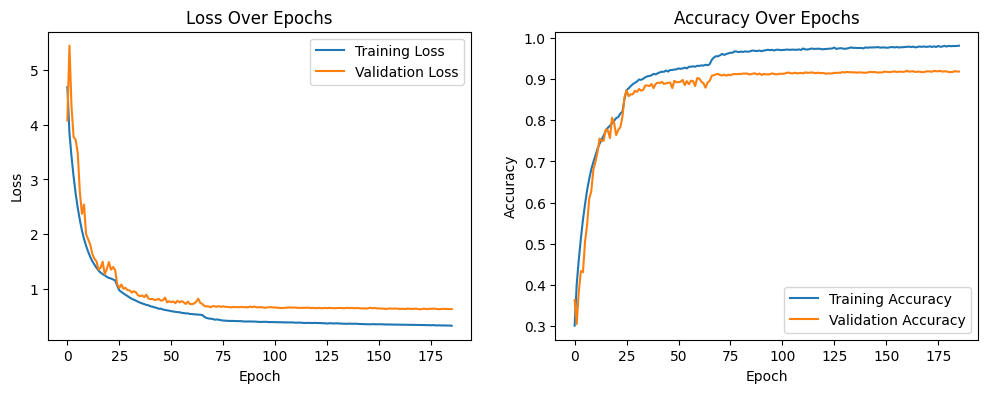

Displayed training history graphs above. Look for decreasing loss and increasing accuracy; callbacks should prevent overfitting.
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9186 - loss: 0.6236
Test loss: 0.6236, Test accuracy: 0.92 (expect improvement, e.g., 0.88-0.94)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


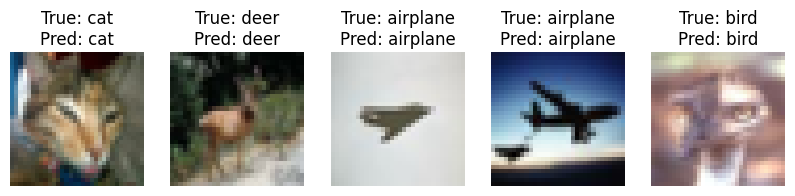

Displayed predictions on 5 test images above. Check if they match!


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Added for early stopping and LR scheduling
from tensorflow.keras import regularizers  # For L2 regularization
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

# Suppress specific warnings (harmless for this example)
warnings.filterwarnings("ignore", message="Protobuf gencode version")
warnings.filterwarnings("ignore", category=UserWarning)  # Additional suppression if needed

# Print TensorFlow version for debugging
print(f"TensorFlow version: {tf.__version__}")

# Step 1: Load the CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f"Training data shape: {x_train.shape} (50,000 images, 32x32 pixels, 3 color channels)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Class labels: {np.unique(y_train)} (0=airplane, 1=automobile, ..., 9=truck)")

# Step 2: Visualize some sample images to understand the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()
print("Displayed 9 sample training images above.")

# Step 3: Preprocess the data with channel-wise normalization
# CIFAR-10 per-channel means and stds
means = np.array([0.4914, 0.4822, 0.4465])
stds = np.array([0.2023, 0.1994, 0.2010])

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Apply mean-std normalization (broadcasting handles channels)
x_train = (x_train - means) / stds
x_test = (x_test - means) / stds

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("Data preprocessing complete. Images normalized (channel-wise), labels one-hot encoded.")

# Add enhanced data augmentation to improve generalization
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.1,  # Added
    shear_range=0.1  # Added
)
datagen.fit(x_train)

# Step 4: Define a ResNet-inspired model for better performance
def residual_block(x, filters):
    shortcut = x
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)  # 1x1 conv for dimension matching
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, shortcut])  # Residual connection
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)
    return x

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.BatchNormalization()(x)
x = residual_block(x, 128)
x = residual_block(x, 256)
x = residual_block(x, 512)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu",
                 kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

# Print model summary
model.summary()

# Step 5: Compile the model with SGD optimizer
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print("Model compiled and ready for training.")

# Define callbacks: early stopping and LR scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

# Step 6: Train the model with data augmentation, more epochs, and callbacks
start_time = time.time()
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),  # Increased batch size
                    epochs=300,  # Increased epochs
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])
total_time = time.time() - start_time
print(f"Training complete! Total time taken: {total_time / 60:.2f} minutes.")

# Step 7: Plot training graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Displayed training history graphs above. Look for decreasing loss and increasing accuracy; callbacks should prevent overfitting.")

# Step 8: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f} (expect improvement, e.g., 0.88-0.94)")

# Step 9: Make predictions on a few test images
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)
samples = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)
predictions = model.predict(samples)
pred_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i] * stds + means)  # Denormalize for display
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.show()
print("Displayed predictions on 5 test images above. Check if they match!")